# Convolutional Neural Network
## Week-7 - 2023

**CIFAR dataset:**

The CIFAR dataset is a popular benchmark dataset in the field of computer vision and machine learning. It is a collection of labeled images used to train and test machine learning models, particularly for image classification tasks. The dataset is widely used because it represents a real-world problem and introduces several challenges that students should be aware of.

**Classification Problem:**

The classification problem of the CIFAR dataset is to correctly categorize images into predefined classes. For CIFAR-10, there are ten distinct classes, and for CIFAR-100, there are one hundred classes. Each image belongs to one of these classes, and the goal is to design a model that can accurately assign the correct class label to each image.





In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install tensorflow

In [2]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

from sklearn.model_selection import train_test_split

In [3]:
# Load the CIFAR-10 dataset

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
print('X_train size: ',X_train.shape)
print('y_train size: ',y_train.shape)
print('X_test size:  ',X_test.shape)
print('y_test size:  ',y_test.shape)

X_train size:  (50000, 32, 32, 3)
y_train size:  (50000, 1)
X_test size:   (10000, 32, 32, 3)
y_test size:   (10000, 1)


In [5]:
# Class names in the CIFAR-10 dataset 

classes=['aircraft', 'car', 'bird', 'cat', 'deer',
 'dog', 'frog', 'hours', 'ship', 'truck']

classes

['aircraft',
 'car',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'hours',
 'ship',
 'truck']

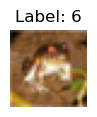

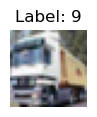

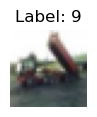

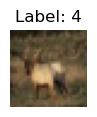

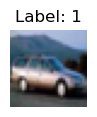

In [6]:
# Display a few images before model development, Hint - plt.title(f"Label: {y_train[i].argmax()}") will give you True Label.
#
#
# Your code to display a few images before the model development.
#
#

for i in range(5):
    plt.figure(figsize=(1, 1))
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i][0]}")
    plt.axis('off')
    plt.show()

In [7]:
# Preprocess the data

X_train = X_train.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
X_test = X_test.astype('float32') / 255.0
y_test = to_categorical(y_test, 10)

### MLP model

In [8]:
# Create an MLP model using Keras

mlp_model = Sequential()
mlp_model.add(Flatten(input_shape=X_train.shape[1:]))
mlp_model.add(Dense(512, activation='relu'))
mlp_model.add(Dense(256, activation='relu'))
mlp_model.add(Dense(10, activation='softmax'))

# print the MLP model

print(mlp_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1707274 (6.51 MB)
Trainable params: 1707274 (6.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [9]:
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train and evaluate the MLP classifier

history = mlp_model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.8657 - accuracy: 0.3235
Epoch 2/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.6749 - accuracy: 0.4000
Epoch 3/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.5951 - accuracy: 0.4281
Epoch 4/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.5479 - accuracy: 0.4454
Epoch 5/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.5105 - accuracy: 0.4581
Epoch 6/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.4798 - accuracy: 0.4723
Epoch 7/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.4648 - accuracy: 0.4744
Epoch 8/10
1563/1563 [==============================] - 41s 27ms/step - loss: 1.4388 - accuracy: 0.4867
Epoch 9/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.4166 - accuracy: 0.4919
Epoch 10/10
1563/1563 [==============================] - 40s 26m

C:\Users\yelav\AppData\Local\Temp\ipykernel_25096\256823875.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


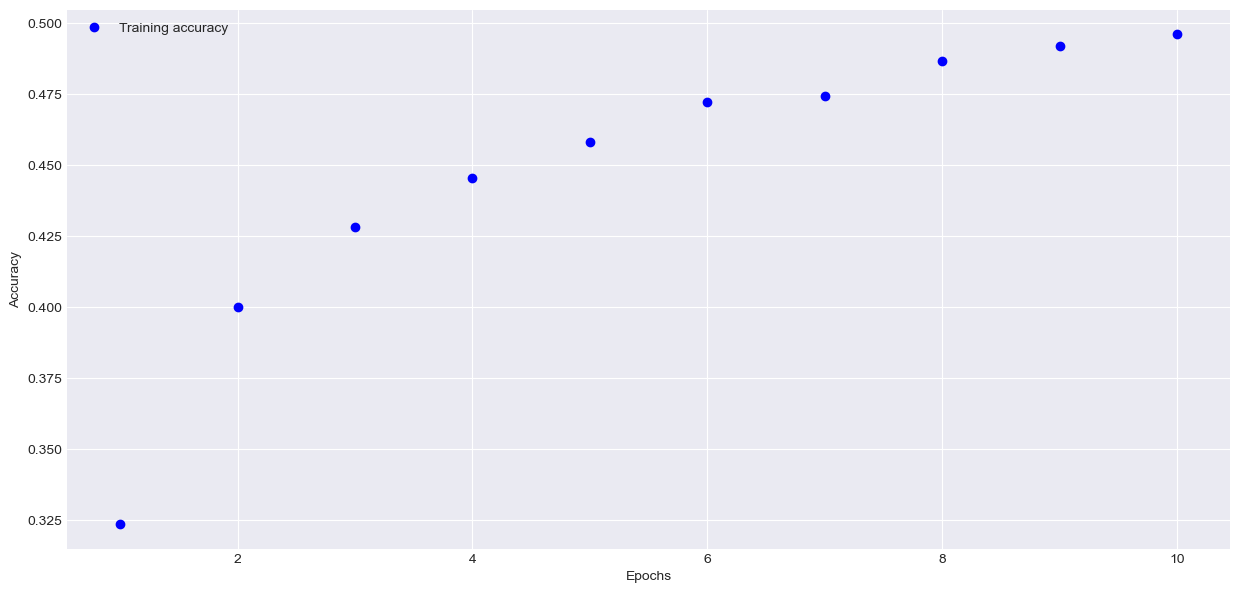

In [13]:
 # Print the training process graph and result 

history_dict = history.history
plt.style.use('seaborn-darkgrid') 

acc_values = history_dict['accuracy']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [14]:
# evaluation - Accuracy result on the Test set

mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"MLP Test Accuracy: {mlp_accuracy * 100:.2f}%")

MLP Test Accuracy: 48.40%


### CNN model

In [15]:
# Create a CNN model using Keras

cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))

cnn_model.add(Flatten())

cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

# print the CNN model

print(cnn_model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [16]:
# compilation

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Train and evaluate the CNN classifier

history2 = cnn_model.fit(X_train, y_train, epochs=10, verbose = 1)

Epoch 1/10
1563/1563 [==============================] - 54s 33ms/step - loss: 1.5156 - accuracy: 0.4423
Epoch 2/10
1563/1563 [==============================] - 52s 34ms/step - loss: 1.1646 - accuracy: 0.5859
Epoch 3/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.0005 - accuracy: 0.6502
Epoch 4/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8981 - accuracy: 0.6864
Epoch 5/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8203 - accuracy: 0.7127
Epoch 6/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7593 - accuracy: 0.7354
Epoch 7/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7089 - accuracy: 0.7518
Epoch 8/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.6579 - accuracy: 0.7695
Epoch 9/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.6164 - accuracy: 0.7855
Epoch 10/10
1563/1563 [==============================] - 52s 33m

C:\Users\yelav\AppData\Local\Temp\ipykernel_25096\1234444163.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


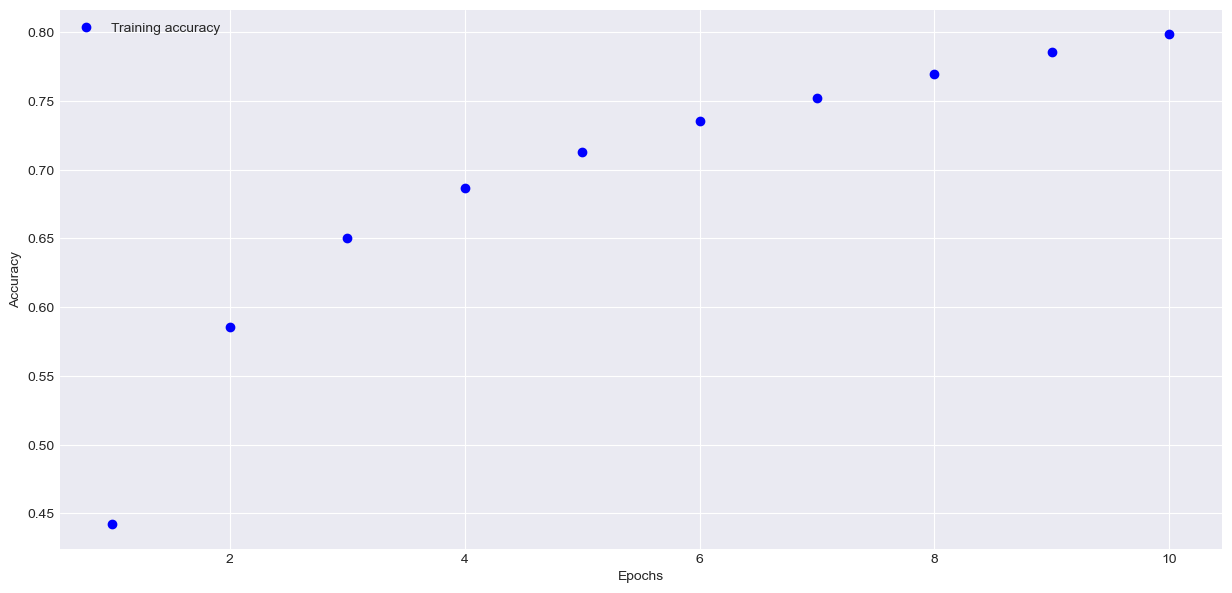

In [18]:
# Your code to print the CNN training process graph and result 
#
#
#

history_dict = history2.history
plt.style.use('seaborn-darkgrid') 

acc_values = history_dict['accuracy']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [19]:
# evaluation - Accuracy result on the Test set

cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"CNN Test Accuracy: {cnn_accuracy * 100:.2f}%")

CNN Test Accuracy: 70.62%


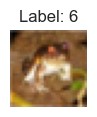

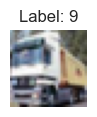

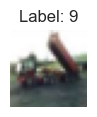

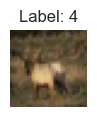

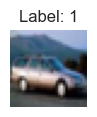

In [20]:
# Display a few images after CNN model development

for i in range(5):
    plt.figure(figsize=(1, 1))
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i].argmax()}")
    plt.axis('off')
    plt.show()



Based on the aforementioned code, perform the following activity:


1.   Using the provided code, create one distinct CNN models with architectures different from the one provided.


2.  Train the model with three different optimizers selected from the options available at https://keras.io/api/optimizers/.

3.  Measure the time it takes to train each model with its respective optimizer by importing the 'time' module and recording the start and end times using 'time.time()'.

4. Include this bar plot in your lab logbook to compare training times with different optimizers.

5. Strive to fine-tune the model parameters to achieve higher accuracy, ideally surpassing 90%. Document in your lab logbook the highest accuracy you have achieved through this fine-tuning process.

In [21]:
# Your code to do the above activity.
# Hint - import time
#
#
import time

In [22]:
# Your code to do the above activity.
# Hint - Put name of optimizers 
#
#
optimizers = ['adam', 'adamax', 'adagrad']

In [23]:
# Your code to do the above activity.
# Hint - Store training time and accuracy in lists
#
#
training_times=[]
accuracies=[]

In [24]:
# Your code to do the above activity.
# Hint - import time and use time.time() just before and after training to record start and end time of the training. Difference will provide the training time.
#
#
#
for optimizer in optimizers:
    print('\n', optimizer, 'optimizer')


 adam optimizer

 adamax optimizer

 adagrad optimizer


In [25]:
# Your code to do the above activity.
# Hint - use loops for use different optimizers

for optimizer in optimizers:
    # Create a new CNN models with architectures different from the one provided
    #
    #
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))

    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    
    # Compile the model with the current optimizer
    #
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Measure training time
    #
    #
    start_time = time.time()
    model.fit(X_train, y_train, epochs=2, batch_size=64, verbose=1)
    
    end_time = time.time()
    
    training_time = end_time - start_time
    training_times.append(training_time)
    
    # Evaluate the model
    #
    #
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(accuracy)
    
    

Epoch 1/2
782/782 [==============================] - 52s 64ms/step - loss: 1.5239 - accuracy: 0.4428
Epoch 2/2
782/782 [==============================] - 51s 65ms/step - loss: 1.1435 - accuracy: 0.5962
Epoch 1/2
782/782 [==============================] - 52s 65ms/step - loss: 1.6161 - accuracy: 0.4136
Epoch 2/2
782/782 [==============================] - 51s 66ms/step - loss: 1.2891 - accuracy: 0.5400
Epoch 1/2
782/782 [==============================] - 51s 63ms/step - loss: 2.2645 - accuracy: 0.1462
Epoch 2/2
782/782 [==============================] - 1048s 1s/step - loss: 2.0676 - accuracy: 0.2549


AttributeError: module 'matplotlib.pyplot' has no attribute 'Xlabel'

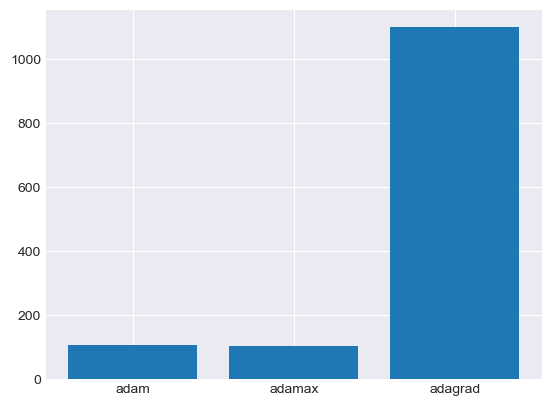

In [26]:
# Your code to do the above activity.
# Generate a bar plot to compare training times
#
#
plt.bar(optimizers, training_times)
plt.Xlabel('optimizers')
plt.ylabel('training_time (seconds)')
plt.title('training_time comparison with different optimizers')
plt.show()

Lab Logbook Requirements:

1. Record the bar graph depicting the comparison of training times.
2. Record the final accuracy achieved.


In [27]:
# Print accuracies achieved with different optimizers

for i, optimizer in enumerate(optimizers):
    print(f"{optimizer} Optimizer - Test Accuracy: {accuracies[i] * 100:.2f}%")

adam Optimizer - Test Accuracy: 61.85%
adamax Optimizer - Test Accuracy: 56.82%
adagrad Optimizer - Test Accuracy: 28.42%


In [28]:
# Your code to
# Find and print the highest achieved accuracy
#
best_accuracy = max(accuracies)
print(f"Highest Accuracy Achieved: {best_accuracy * 100:.2f}%")

Highest Accuracy Achieved: 61.85%
